#### Data analysis notebook

Reads in the data files and plot results

  * Instantiate analyzer class object **Geant4Analyzer(root_filename, label)**
  * Then apply cuts to the data
  * Plotting with the built-in function **plot_histogram()**
  * For user defined plots, just access the data elements directly: **Geant4Analyzer.data[element_name]**. Get the data element names from **Geant4Analyzer.data.keys()**

Data loaded from /data/xenon/acolijn/G4FastSim/standard/standard_test.root
Data loaded from /data/xenon/acolijn/G4FastSim/fast/fast_test.root


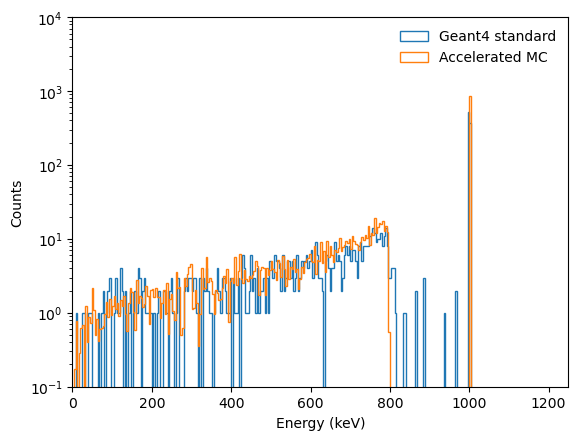

In [21]:
from analyzer import Geant4Analyzer
import matplotlib.pyplot as plt
import numpy as np

# define the cuts to apply to the data

# cut on teh global event variables
cut = lambda data: (data['ncomp'] + data['nphot'] == 1) & (data['type'] == 0) & (np.abs(data['zp'])<1500)
# additional cuts on the clusters
cut_hit = lambda data: ((data['r'] < 1100.))

std = Geant4Analyzer("/data/xenon/acolijn/G4FastSim/standard/standard_test.root", label="Geant4 standard")
std.preprocess_data(cut=cut, cut_hit=cut_hit)

fast = Geant4Analyzer("/data/xenon/acolijn/G4FastSim/fast/fast_test.root", label="Accelerated MC")
fast.preprocess_data(cut=cut, cut_hit=cut_hit)

nbin = 500
ax = std.plot_histogram('eh', bins=nbin, range=(0,2000), show=False)
ax = fast.plot_histogram('eh', bins=nbin, ax=ax, range=(0,2000), show=False)

plt.yscale('log')
plt.ylim(1e-1, 1e4)
plt.xlim(0,1250)

plt.legend(frameon=False)
plt.show()


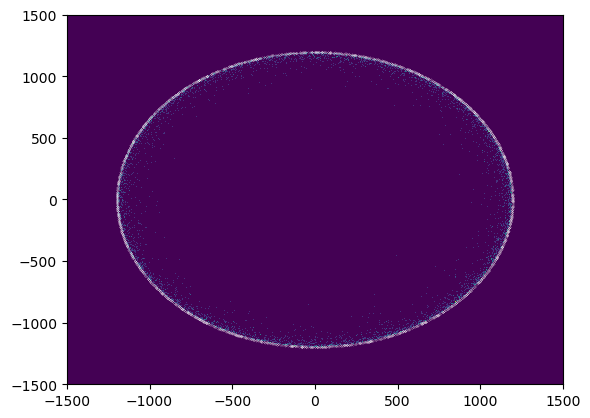

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
bins = 1000
h = plt.hist2d(fast.data['xh'], fast.data['yh'], bins=bins, range=((-1500, 1500), (-1500, 1500)))
#h = plt.hist2d(std.data['xh'], std.data['yh'], bins=bins, range=((-1500, 1500), (-1500, 1500)))
plt.scatter(std.data['xp'], std.data['yp'], s=0.01, c='w')

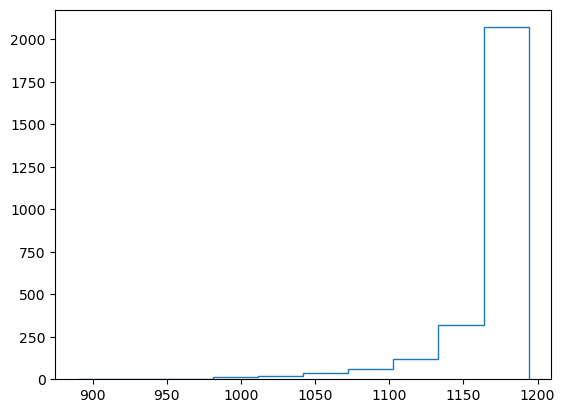

In [9]:
fig,ax = plt.subplots()
ax = plt.hist(std.data['r'], histtype='step')